# Optimizing Financial Performance in Food Delivery Operations

### Aim:

Conducted a comprehensive Food Delivery Cost and Profitability Analysis to understand and optimize the financial dynamics of a food delivery operation. Identify areas to reduce costs, increase revenue, and implement pricing or commission strategies that enhance profitability.

### Optimizing Financial Performance in Food Delivery Operations involves:

* Examining all costs associated with delivering food orders:
  - Direct expenses: delivery fees, packaging.
  - Indirect expenses: discounts offered to customers, commission fees paid by restaurants.
  
  
* Comparing these costs against the revenue generated:
  - Revenue sources: order values, commission fees.
  
  
* Providing insights into the profitability of the food delivery service on a per-order basis.

In [1]:
import pandas as pd

In [4]:
food_orders = pd.read_csv(r"C:\Users\Gayatri\Downloads\food_orders_pune.csv")
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [5]:
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


### The dataset comprises 1,000 entries and 12 columns, with no missing values. To proceed with data cleaning and preparation, we will:

* Convert "Order Date and Time" and "Delivery Date and Time" to a datetime format.
* Standardize "Discounts and Offers" to a consistent numeric value or calculate the discount amounts where applicable.
* Ensure all monetary values are formatted appropriately for calculations.

### Data preparation steps:

In [6]:
from datetime import datetime

In [12]:
# Convert 'Order Date and Time' column to datetime format
food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])

# Convert 'Delivery Date and Time' column to datetime format
food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])

In [13]:
# Function to extract numeric discount values from the 'Discounts and Offers' string
def extract_discount(discount_str):
    """
    Extracts numeric discount values from a string containing discount information.

    Parameters:
    - discount_str (str): String containing discount information.

    Returns:
    - float: Numeric value of the discount, or 0.0 if no discount is found.
    """
    if 'off' in discount_str:
        # Extract fixed amount off
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        # Extract percentage off
        return float(discount_str.split('%')[0])
    else:
        # No discount present
        return 0.0


In [14]:
# Applying the extract_discount function to create a new 'Discount Percentage' column
food_orders['Discount Percentage'] = food_orders['Discounts and Offers'].apply(lambda x: extract_discount(x))

In [15]:
# Calculate the discount amount based on the order value for percentage discounts
food_orders['Discount Amount'] = food_orders.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                   if x['Discount Percentage'] > 0
                                                   else 0, axis=1)

In [16]:
# Adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column
food_orders['Discount Amount'] = food_orders.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 0
                                                   else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)

In [17]:
print(food_orders[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head(), food_orders.dtypes)

   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                 None                  0.0             0.00
4         1992         50 off Promo                 50.0           996.00 Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Percentage              float64
Discount Amount        

### Cost and Profitability Analysis:

In [19]:
# calculate total costs and revenue per order
food_orders['Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Discount Amount']
food_orders['Revenue'] = food_orders['Commission Fee']
food_orders['Profit'] = food_orders['Revenue'] - food_orders['Total Costs']

In [20]:
# aggregate data to get overall metrics
total_orders = food_orders.shape[0]
total_revenue = food_orders['Revenue'].sum()
total_costs = food_orders['Total Costs'].sum()
total_profit = food_orders['Profit'].sum()

In [21]:
overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

In [23]:
overall_metrics

{'Total Orders': 1000,
 'Total Revenue': 126990,
 'Total Costs': 232709.85,
 'Total Profit': -105719.85}

#Based on the analysis:

- Total Orders: 1,000
- Total Revenue (from Commission Fees): 126,990 INR
- Total Costs (including delivery fees, payment processing fees, and discounts): 232,709.85 INR
- Total Profit: \(-105,719.85\) INR

The analysis shows that the costs of running the food delivery operations outweigh the revenue earned from commission fees, resulting in a net loss. This suggests that current commission rates, delivery fees, and discount strategies may not be sustainable for profitability.

### Exploratory Data Analysis:

In [24]:
import matplotlib.pyplot as plt

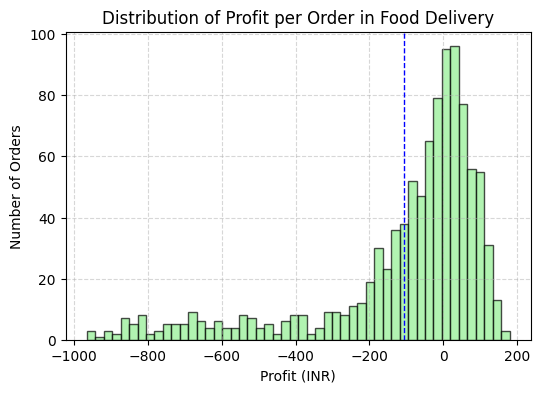

In [31]:
# Profits per order
plt.figure(figsize=(6, 4))
plt.hist(food_orders['Profit'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Profit per Order in Food Delivery')
plt.xlabel('Profit (INR)')
plt.ylabel('Number of Orders')
plt.axvline(food_orders['Profit'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

The histogram displays a range of profit per order, revealing that many orders resulted in losses (profits below 0). The dashed red line marks the average profit, which is negative, indicating an overall situation of losses.

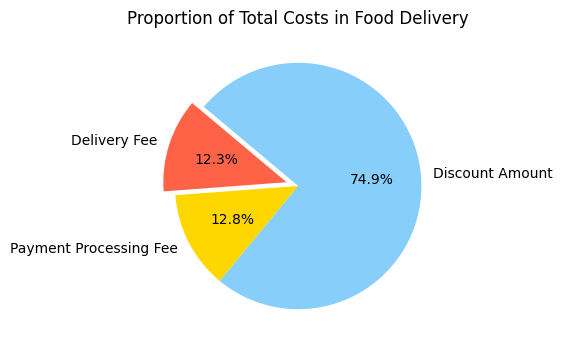

In [35]:
# Proportion of total costs
costs_breakdown = food_orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(4, 4))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['#FF6347', '#FFD700', '#87CEFA'], explode=(0.1, 0, 0))
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()


The pie chart shows how total costs are divided among delivery fees, payment processing fees, and discount amounts. Discounts make up a substantial part of these costs, indicating that promotional strategies could significantly affect overall profitability.

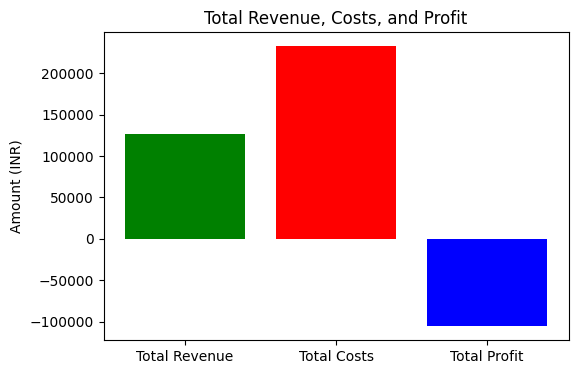

In [40]:
# Analysis of Total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(6, 4))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

The bar chart compares total revenue, costs, and profit. It clearly shows that costs exceed revenue, resulting in an overall loss.

## Profitability Strategy:

- Current analysis shows that discounts on food orders are causing significant losses.

##### We need to strike a balance by analyzing profitable orders to determine:
- A new average commission percentage for profitability.
- An optimal average discount percentage that ensures profitability while encouraging customer orders.

##### Recommendations:
- Based on these averages, we'll propose adjustments to enhance profitability both on individual orders and across the board.

In [43]:
# filter the dataset for profitable orders
profitable_orders = food_orders[food_orders['Profit'] > 0]

In [46]:
import warnings
warnings.filterwarnings("ignore")

# calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

In [47]:
# calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

In [50]:
# calculate the new averages
avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

In [53]:
print(avg_commission_percentage, avg_discount_percentage)

30.508436145149435 5.867469879518072


Based on this analysis, a strategy that aims for a commission rate closer to 30% and a discount rate around 6% could potentially improve profitability across the board.

### To show how using the suggested discount and commission rates could change order profits, we'll compare their effects visually.

In [54]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 30.0  # 30%
recommended_discount_percentage = 6.0    # 6%

In [55]:
# calculate the simulated commission fee and discount amount using recommended percentages
food_orders['Simulated Commission Fee'] = food_orders['Order Value'] * (recommended_commission_percentage / 100)
food_orders['Simulated Discount Amount'] = food_orders['Order Value'] * (recommended_discount_percentage / 100)

In [56]:
# recalculate total costs and profit with simulated values
food_orders['Simulated Total Costs'] = (food_orders['Delivery Fee'] +
                                        food_orders['Payment Processing Fee'] +
                                        food_orders['Simulated Discount Amount'])

food_orders['Simulated Profit'] = (food_orders['Simulated Commission Fee'] -
                                   food_orders['Simulated Total Costs'])

In [57]:
# visualizing the comparison
import seaborn as sns

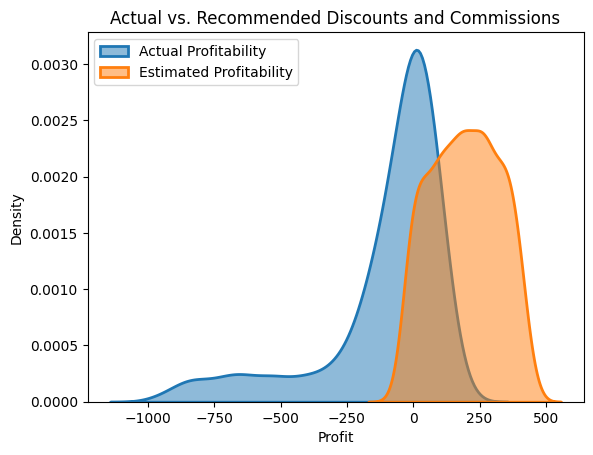

<Figure size 1400x700 with 0 Axes>

In [60]:
#Comparison of Profitability in Food Delivery:

# actual profitability
sns.kdeplot(food_orders['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(food_orders['Simulated Profit'], label='Estimated Profitability', fill=True, alpha=0.5, linewidth=2)

plt.title('Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.figure(figsize=(14, 7))
plt.show()

##### Comparison of Profitability Distribution:
  - Compares profitability per order using current discounts and commissions versus recommended rates (6% discount and 30% commission).
  
##### Actual Distribution:
  - Many orders show losses (profit < 0) with a wide range of profit levels.
  
##### Simulated Scenario:
  - Projects higher profitability per order.
  - More orders expected to be profitable with recommended rates.

##### After analyzing the impact of discounts and commissions on food delivery profitability, it's evident that current strategies are leading to significant losses. Implementing recommended discount (6%) and commission (30%) rates shows promising potential to improve profitability. The analysis highlights the importance of strategic pricing and commission structuring in achieving sustainable profitability in food delivery operations.